In [1]:
import itertools
from cwgp.grid_search import grid_search
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import GPy
from sklearn.metrics import mean_absolute_error, mean_squared_error
import os
import scipy

In [2]:
def exp(x, *par):
    return par[0]*np.exp(par[1]*x)

In [3]:
def poly(x, *par):
    return np.polyval(par,x)

In [4]:
def constant(x, *par):
    return 0

In [13]:
def sigmoid(x, *par):
    return par[0]/(1+np.exp(par[1]*x))

In [5]:
poly(3,1,2,3)

18

In [6]:
def gp_regression(x, y, mean_func, init_param):
    kernel = GPy.kern.RBF(1)
    ratio = 0.9
    length = len(rate)
    train = int(ratio*length)
    train_up, train_low = train, train-train

    res = scipy.optimize.curve_fit(mean_func,  np.ravel(year), np.ravel(rate), p0=init_param)
    par = res[0]
    mf = GPy.core.Mapping(1,1)
    mf.f = lambda x: mean_func(x, *par)
    mf.update_gradients = lambda a,b: None


    model = GPy.models.GPRegression(x[train_low:train_up], y[train_low:train_up], mean_function=mf, kernel=kernel)
    model.optimize()

    y_pred = model.predict(x[train_up:])[0]
    y_true = y[train_up:]

    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)

    txt = f"""rmse : {rmse} \n mae : {mae}"""

    model.plot(plot_limits=[1940,2031])

    plt.title('Age ' + str(age) + f" {mean_func.__name__}")
    plt.xlabel('Year')
    plt.ylabel('Mortality Rate' )
    plt.scatter(x[train_up:], y[train_up:], marker="x", color='red')
    plt.figtext(0.5, 0.2, txt, wrap=True, horizontalalignment='center', fontsize=12)
    # plt.ylim([0.1,0.35])
    plt.ylim([0.1,0.35])

    plt.grid(True)
#     plt.savefig(f'./{IMG_DIR}/{mean_func.__name__}_{age}_mf.png')
    plt.show()


In [7]:
CSV_FIlE = "../japan3.csv"
df = pd.read_csv(CSV_FIlE)
age = 90
df_all = {}
df_all[age]= df[(df["age"]==age)]

year = df_all[age]["year"].to_numpy().reshape(-1,1)
rate = df_all[age]["rate"].to_numpy().reshape(-1,1)

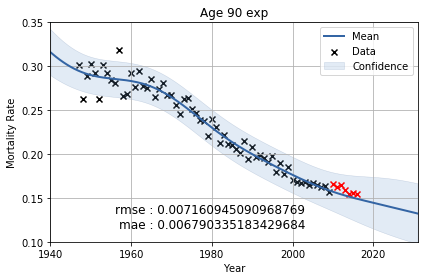

In [8]:
gp_regression(year, rate, exp, (1, -0.0001))

 /home/chen/work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning:overflow encountered in exp
 /home/chen/work/venv/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning:Covariance of the parameters could not be estimated
 /home/chen/work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning:overflow encountered in exp


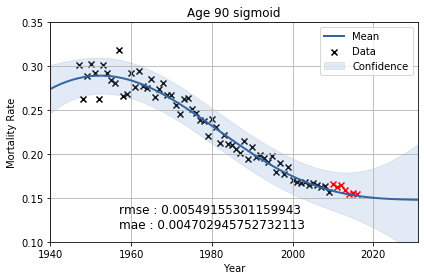

In [16]:
gp_regression(year, rate, sigmoid, (1, 1))

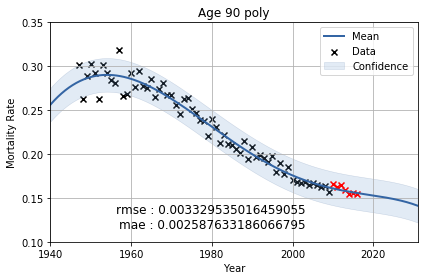

In [9]:
gp_regression(year, rate, poly, (1, 0.1, 1,1,1,1))

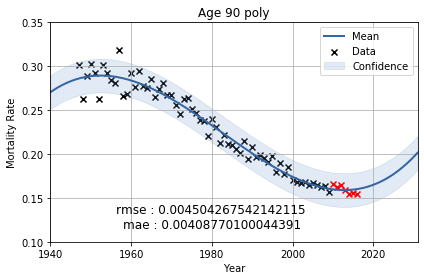

In [12]:
gp_regression(year, rate, poly, (1, 0.1, 1,1))

 /home/chen/work/venv/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning:Covariance of the parameters could not be estimated


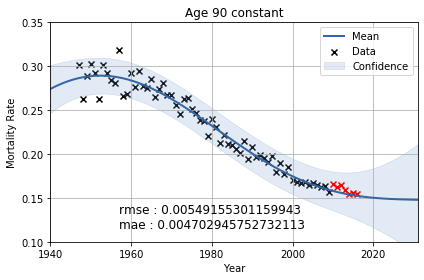

In [11]:
gp_regression(year, rate, constant, (1))